# C4AI Scholars Program Takehome Challenge


### Background

Welcome to the C4AI Scholars Program Take-Home Challenge! This exercise is designed to allow you to showcase your engineering and problem solving skills. The Challenge consists of three parts:

* Part One of the challenge requires identifying bugs, and getting the code working. This is designed to test your ability to grapple with real world engineering challenges.
* Part Two of the challenge tests your ability to generate code for a specified problem. 
* Part Three of the challenge is an opportunity for you to attempt an optional challenge question that extends the original problem set. 


These tasks were chosen as a setting to see how you think about problems, even if they are not in your own research field of interest. The tasks and dataset are not meant to be indicative of the research goals of the Scholar Program. We purposefully have selected a simple toy problem so the focus is on how you think, and does not require significant machine learning resources. 

Good luck! If you have questions about the framing of the questions, please contact info@for.ai  


### How to Use and Submit this Document

* **Make a copy of this document** and **rename** it **Firstname_Lastname_C4AIScholarsChallenge**
* Once you’ve completed all tasks, **save and pin your revisions**
* **Submit a link** to your final document via the [Cohere For AI Scholars Program application](https://jobs.lever.co/cohere/?department=Cohere%20For%20AI). 



---



## Overview of Singular Value Decomposition

In this takehome, you will be working on a problem involving singular value decomposition. Singular Value Decomposition (SVD) exists for every rectangular matrix. The nice thing about SVD is that the original matrix can be expressed as the sum of outer products of left and singular vectors scaled by the corresponding singular values. Formally:

> Let 𝛢 be a rectangular matrix of dimensions 𝑚𝘹𝑛, then the SVD of the matrix A is given by $ A = U𝛴V^T$ where $U$ is an orthogonal matrix of shape mxm containing the left singular vectors, $V$ is an orthogonal matrix of shape nxn containing the right singular vectors and $𝛴$ is a diagonal matrix containing the singular values of $A$. This formulation of SVD can be re-expressed as \begin{align} A = \sum_{i=1}^{r} s_i. u_i v_i^T \end{align} where $r = \text{min}(m,n)$ represents the rank of the matrix, $s_i$ is the $i$th singular value and $u_i v_i^T$ is the outer product of the $i$th left and right singular vectors. 

<!-- \begin{align}
A = \sum_{i=1}^{\text{min}(m,n)} s_i. u_i v_i^T
\end{align}
\begin{align} -->

> The singular values $𝛴$ are decreasing in order. So, each outer product is scaled by a smaller value as we compute each term in the sum above. This gives us an opportunity to approximate $A$ using only the sum of the first $k$ outer products where $k < \text{min}(m,n)$ $-$ this effectively means that we are zero-ing out some of the singular values by assuming that the contribution to the sum is negligible. This is called low-rank approximation.

If you aren't familiar with singular value decomposition, or the above feels rusty, don't worry. Take a moment to brush up your knowledge using any of the following resources:
* [stanford lecture notes on low rank approximations](https://web.stanford.edu/class/cs168/l/l9.pdf)
* [youtube series of short and beginner friendly lectures](https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)



## Check for understanding (3 points)

#### Q1: What are some real world applications of low rank approximations?


#### Answer: 

One real-world application of low rank approximations is (lossy) data compression. In particular, if a dataset can be represented as a matrix, then low rank approximation can be used to find another matrix that is “close” to the original matrix (where the “distance” between the matrices is measured by the Frobenius norm) but that can be represented more compactly/using less space than the original matrix. For example, an image can typically be represented as a matrix (or a collection of matrices). Low rank approximation can be used to find an image that is “close” to the original image (perhaps even indistinguishable to the human eye) but that can be represented much more compactly, and therefore occupy less space in memory or persistent storage.

Another real-world application of low rank approximation is de-noising. Consider again an image whose data can be represented as a matrix of numbers. The image data may be somewhat “noisy” due to, for example, electronic noise in the circuits of the camera that captured it. One potential way to “denoise” the image is to: (1) compute the singular value decomposition of the image matrix, (2) identify the largest/most important singular values, and (3) compute a low-rank approximation to the original matrix using only these largest singular values and the corresponding left and right singular vectors. The assumption of this approach to denoising is that the smallest singular values and their corresponding rank-1 matrices represent the “noise” in an image and should therefore be eliminated (this assumption may not be true, however, if there is a lot of noise relative to “signal” in the image).



#### Q2: What are the benefits of compressing a deep neural network? How would you measure the benefits of compression?


#### Answer: 

When using a neural network in an application (e.g. as part of a robot’s perceptual system, in a content selection algorithm, in a text generation algorithm, etc.), there are several things that relevant stakeholders (e.g. users, a company’s shareholders, society at large etc.) might care about, including: 

1) Inference latency (i.e. how long it takes to execute a single inference). For example, an autonomous car needs to be able to quickly react to changes in its environment, so it's important that it is able to quickly process raw perceptual data and make decisions.

2) Inference throughput (i.e. how many inferences a system can execute per unit of time). For example, a website that enables people to generate images from text may want to be able to service the requests of large numbers of users simultaneously, in which case the people developing the website might care about inference throughput (including increasing inference throughput without needing to add significant additional computational resources). 

3) Computational costs and environmental impact. People and organizations typically prefer to minimize the amount of money/resources they need to spend to achieve a given goal/result. Additionally, people and organizations might care about minimizing/reducing any negative impact their activities have on the environment. As a result, people and organizations using neural networks may care about reducing the computational resources and energy required to do inference, which would in turn reduce the costs and environmental impact associated with using them. Using more efficient algorithms that require fewer and/or less expensive/energy intensive operations can reduce both costs and environmental footprint. In addition, costs can also be reduced by reducing the amount of persistent storage required to store the code and data associated with a program/application (including, for example, information about the weights and architecture of a neural network the program uses). 

4) Quality of the inferences/predictions. Typically the point of using a neural network (or any other sort of model) is to make useful predictions about some aspect of the world (e.g. which content a user of a social media platform is most likely to engage with, what are the most likely future trajectories of a pedestrian crossing the road, which moves in a game of chess are the most likely to lead to a win, etc.). Given this, the quality/accuracy of the predictions a neural network makes greatly affects its utility to users.


Compressing deep neural networks can potentially help improve all of the above things. First, compressing a neural network can potentially enable lower latency inference. In particular, inference using a compressed representation of a neural network may require fetching less data from memory, which may significantly speed up inference given how slow memory references can be. Additionally, if the same neural network is used multiple times in quick succession, later inferences might be faster than the first inference if more of the data needed to execute subsequent inferences (e.g. the network weights) is located higher in the memory hierarchy than it was when the first inference was executed (e.g. in L1, L2, or L3 cache versus in main memory). Using a compressed representation of a neural network could help to facilitate this, since a larger fraction of the data associated with the neural network may fit in higher levels of the memory hierarchy, and a smaller fraction of it would need to be replaced/swapped out between inferences. Additionally, in some cases neural network compression can reduce the number of arithmetic operations required to conduct inference, which can further reduce inference latency. Reducing inference latency would also increase inference throughput (though the reverse is not always true). 

Compressing a deep neural network can also potentially reduce the costs and environmental impact associated with using it. From what I understand, memory references tend to be significantly more energy intensive than other types of operations. By reducing the memory references required to use a neural network, compression could potentially significantly reduce the energy neural network inference consumes. In cases where neural network compression reduces the number of arithmetic operations required to do inference, this would further reduce the computational and energy resources required to use the neural network. In addition, compressing a neural network by definition reduces the amount of space it occupies in persistent storage, which can further reduce costs associated with using it.

Last, compressing a deep neural network may potentially help select better models that will make higher quality/more accurate predictions. In particular, a common concern in machine learning and statistics is that in some cases a model fits observations/data well not because it identifies general patterns in the structure of the data, but rather because it in some sense “memorizes” the data (this phenomenon is sometimes called “overfitting”). For example, a model might have a separate narrowly applicable rule accounting for each individual observation rather than a single more general rule that seems to account well for all observations. The worry is that a model that overfits observations may not generalize well beyond the situations in the training data, since the components of an overfit model that cause it to fit observations well are narrow patterns that are highly specific/local to one or a small number of observations, rather than more general patterns that match the global structure of the data. In other words, an overfit hypothesis doesn’t even identify patterns that generalize within the situations in the training data, so you might reasonably expect that such a hypothesis is unlikely to generalize to novel situations. 

One way to reduce the risk of overfitting is to penalize models with higher “descriptive complexity” in the learning/training/model selection process (roughly speaking, the “descriptive complexity” of a hypothesis is the minimum number of symbols required to precisely describe it in some formal language (e.g. a computer programming language like Python)). The theory/intuition underlying this approach is that models with low descriptive complexity (i.e. models that can be described in a small number of symbols) are less likely to overfit data than models with high descriptive complexity since there is less “descriptive space” in which to fit a lot of narrow/local rules in lower descriptive complexity models. As a result, if two models fit data/observations equally well but one has significantly lower descriptive complexity, it might make sense to select/use (or more heavily weight) the model with lower descriptive complexity.

In order to penalize models with higher descriptive complexity in the training process, you need some way to measure a model’s descriptive complexity. In particular, you need to: (1) select a formal language to use to describe models, and (2) if there are multiple ways of describing a model in that language, you need to decide which of these descriptions should be used to measure the model’s descriptive complexity. A natural rule for (2) is to use the length of the shortest (i.e. the most “compressed”) description of the model (which is sometimes called the “Kolmogorov complexity” of the model) as a measure of its descriptive complexity, since longer descriptions might contain redundant/extraneous/unnecessary symbols (e.g. the expressions f(x) = x and f(x) = x + 5 - 3 - 2 + 100 - 90 - 10 both describe the same function, but the second description has several unnecessary symbols). Unfortunately, however, it turns out that there is no general algorithm that can be used to find the length of the shortest description of a model. As a result, the best that can be done in practice is to use computable compression algorithms to try to approximate the descriptive complexity of a model. Lossless neural network compression techniques may therefore be useful when trying to approximate the descriptive complexity of different neural networks, which may in turn help to identify neural networks that have a better chance of generalizing well beyond the training data. 


#### Q3: In this takehome, we will consider how singular value decomposition can be used to compress a deep neural network. Compared to other compression methods used for deep neural networks such as pruning, quantization, or efficient architectures, what are the relative merits/demerits of low rank approximations? Choose one or two alternative compression methods and compare with singular value decomposition.

#### Answer:

I’ll compare low rank approximation to pruning and quantization. In particular, I’ll compare the advantages and disadvantages of these approaches with respect to the characteristics of neural network inference that I identified in my response to the previous question (inference latency and throughput, computational costs and environmental impact, and quality of inferences/predictions). There are many different variations of pruning (e.g. you can prune any combination weights, neurons, or layers, you can reinitialize weights after after pruning and before retraining or you can retrain starting from the old weights, etc.) and quantization (e.g. you can replace 32 bit floating point numbers with either 16 bit floating point numbers or 8 bit integers, you can do quantization post-training or do “quantization-aware” training, etc.). As a result, in addition to describing what I understand to be the general merits and demerits of these approaches relative to low rank approximation, I’ll also try to describe how some of these variations might affect the advantages and disadvantages of these approaches. 

PRUNING VERSUS SINGULAR VALUE DECOMPOSITION

Inference latency and throughput:

-Both pruning and low-rank approximations can enable significant model compression. However, pruning that only prunes weights only enables compression if: (1) the pruning process results in sparse weight matrices, and (2) the sparse weight matrices are represented using specialized data structures (e.g. compressed sparse row) that exploit their sparsity to enable compression. However, the data structures used to compress sparse matrices are often not well-suited to exploiting the single instruction multiple data (SIMD) parallelism of GPUs when doing matrix multiplication. As a result, on GPUs sparse matrix multiplication algorithms sometimes run slower than dense matrix multiplication algorithms (which are very well-suited to exploiting the SIMD parallelism of GPUs) for matrices with comparable dimensions. So while weight pruning may enable significant model compression, in some cases GPU-based inference using the compressed representations of the weight matrices may not be faster (and may in fact be slower) than inference using the original weight matrices (though from what I understand this depends in part on how sparse the weight matrices are after pruning, with extremely sparse matrices sometimes enabling faster inference). As a result, pruning only weights may not actually result in a substantial improvement in inference latency or throughput. 

-In contrast, low-rank approximation enables you to achieve substantial (lossy) compression of a weight matrix without using data structures specialized for compressing sparse matrices. In other words, you can often represent the three matrices that result from a low-rank approximation as two-dimensional arrays and still achieve a substantial amount of compression (and if it seems advantageous to represent these matrices using data structures specialized for sparse matrices, this is still an option). Because dense matrix multiplication algorithms are better-suited to exploiting the SIMD parallelism of GPUs than sparse matrix multiplication algorithms, in some cases low-rank approximation techniques may enable a greater improvement in inference latency and throughput for the same level of compression versus weight-only pruning when inference is being done on GPUs.

-However, pruning techniques that prune neurons or entire layers from a neural network will typically enable both model compression and improvements in inference latency and throughput, since elimination of a neuron reduces the size of the corresponding weight matrix (and eliminates the need to do the computations required to compute the output of that neuron) and elimination of a layer will eliminate an entire weight matrix (and the need to do the computations required to compute the outputs of all the neurons in that layers).  
  

Costs and environmental impact:

-Both pruning and low-rank approximation techniques can enable substantial compression of a neural network, which can reduce the amount of persistent storage needed to store the neural network. It’s not obvious to me that one technique consistently enables more compression than the other, since in both cases the amount you are able to compress a network may depend to a significant degree on how much you are willing to trade off prediction quality/information loss against compression (though perhaps in some cases the accuracy-compression “efficient frontier” you are able to achieve with pruning may be better than what’s achievable with low-rank approximation since pruning is more flexible, more targeted, and lends itself to retraining). 

-As mentioned above, in some cases pruning only weights can result in less computationally efficient inference for a given level of compression than low-rank approximation. In cases where that is true, low-rank approximation may enable lower computational costs and environmental impact than weight-only pruning.  


Quality of inferences/predictions:

-When using low-rank approximation to compress a weight matrix, for a given level of compression there is essentially only one way to approximate the original weight matrix. Another way of putting this is that for a weight matrix of rank k, there are only k ways of approximating this matrix via low-rank approximation (essentially the only choice you have is what you want the rank of the approximating matrix to be). In contrast, pruning allows you to choose any subset of the weights in a matrix to zero out, and also allows you to eliminate entire weight matrices or rows of weight matrices. Moreover, pruning allows you to target what exactly you prune based on estimates how much pruning something will impact the training loss (e.g. you can compute the partial derivative of the loss with respect to each weight parameter and then only eliminate weights where this partial derivative is small). The fact that pruning is more flexible than low-rank approximation (in the sense that there will typically be many more ways of achieving a given level of compression via pruning than via low-rank approximation) combined with the fact that pruning can be done in a targeted fashion suggests that pruning may in many cases enable higher quality inferences/predictions for a given level of compression than low-rank approximation.

-In addition, pruning lends itself very naturally to retraining/fine-tuning of a pruned/compressed neural network. On the other hand, it is not obvious how to do fine-tuning/retraining on neural networks that have been compressed using singular value decomposition, since the retraining process might result in weight matrices with higher rank than the original low-rank approximations. If this happens, these higher-rank retrained weight matrices would then need to be approximated using singular value decomposition again to achieve the same level of compression. It is perhaps an interesting research question whether this cycle of low rank approximation→retraining→low rank approximation would produce compressed neural networks that make higher quality predictions than simply doing low rank approximation once, but it isn’t obvious to me that it would. The fact that pruning lends itself naturally to retraining/fine-tuning while low-rank approximation doesn’t further suggests that pruning may tend to enable higher quality inferences/predictions for a given level of compression than low-rank approximation. 


QUANTIZATION VERSUS SINGULAR VALUE DECOMPOSITION:

Inference latency and throughput:

-Both quantization and low-rank approximation can enable substantial compression of neural networks. In addition, the compressed neural network representations produced by both of these techniques are compatible with dense matrix multiplication algorithms that exploit the SIMD parallelism of GPUs. As a result, both techniques can enable substantial improvements in inference latency and throughput, since they can reduce the number of memory references required for inference in a way that doesn’t result in inefficient use of GPU resources (as can sometimes be the case with pruning). Quantization that converts floating point numbers to integers may enable further improvements in latency and throughput if the network inputs are also integers (or are converted from floating point to integer format before inference), since integer operations often take fewer cycles to execute than the corresponding floating point operations. With that said, it is not obvious to me that one technique consistently enables greater improvements in latency and throughput than the other, since in both cases the extent of these improvements may depend both on (1) the extent to which you’re willing to trade off latency and throughput against information loss, and (2) the architecture of the computer the inference is running on.  


Costs and environmental impact:

-As mentioned above, both quantization and low-rank approximation can enable substantial neural network compression, which can significantly reduce the amount of persistent storage required to store neural networks. In addition, since both techniques can also enable inference to be done with fewer memory references and using fewer compute cycles, both techniques can enable substantial reductions in computational costs and energy usage. It’s not obvious to me that one technique is consistently better than the other along these dimensions. 


Quality of inferences/predictions:

-Post-training quantization is arguably slightly more of a blunt instrument than low-rank approximation, since post-training quantization indiscriminately reduces the precision of all network weights while low-rank decomposition enables you to find weight matrix approximations that are as “close” as possible to the original weight matrices for a given level of compression. As a result, you might expect that low-rank approximation will tend to enable higher quality inferences/predictions than quantization for a given level of compression (though admittedly the argument I’m making here isn’t totally rigorous and is based in part on my intuition). 

-Quantization-aware training allows you to search through the quantized parameter space for models that fit the training data well. As a result, quantization-aware training is arguably a more targeted way to compress models than post-training quantization and therefore may result in models that make higher quality predictions for a given level of compression. However, if the loss landscape in parameter space has sharp “peaks” and “valleys,” even quantization-aware training might not be able to find models that fit the training data well, if none of the areas of parameter space where training loss is low are on the “grid” of quantized parameters. 




---



### Imports

In [ ]:
!pip install dm-haiku optax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 350 kB 16.4 MB/s 
     |████████████████████████████████| 145 kB 47.7 MB/s 
     |████████████████████████████████| 85 kB 2.3 MB/s 


In [ ]:
from typing import Iterator, Mapping, Tuple
from copy import deepcopy
import time
from absl import app
import haiku as hk
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpy as np
import optax
import tensorflow_datasets as tfds
import tensorflow as tf
from functools import partial
import math
import sys

Batch = Tuple[np.ndarray, np.ndarray] # Defining an alias for a type that is a tuple containing two NumPy arrays, presumably for use in type hints for a static analysis tool



---




## Coding Challenge Part I : Debugging Challenge (10 Points)


We are now going to explore using SVD to compute low rank approximations of the parameters of a small deep neural network. You are using a very simple toy model as a first baseline. Section 3 will give you the chance to improve baseline accuracy beyond this very simple model -- this is just a toy setting to first explore low rank approximations.

The first part of this challenge is primarily a debugging challenge. It will require removing bugs in order to train a very simple network. We have introduced several bugs -- some are subtle and will not break your code but will degrade final performance. These subtle bugs are introduced to understand your grasp of fundamental machine learning principles. There are also more obvious bugs designed to break your code. 

* [**4 points**] Your goal is to get the code working. There are 4 bugs in the code, these are subtle bugs which are designed to impair test accuracy but not break the code. You will get partial points for each of the 4 bugs you find. After finding all bugs, your test performance should be around 66-67% test accuracy.

* [**2 points**] We will give extra points for also adding improved documentation to each of the functions we introduce in this section, and for describing the fixes to the bugs. 

* [**4 points**] There are also two functions you will need to code up in this section -- we indicate where these code changes need to happen with TODO comments. 

* Do not alter the model architecture or the learning rate.

In [ ]:
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465) # mean values for the red, green, and blue channels respectively for all of the pixels in all of the images in the normalized CIFAR10 training dataset
"""
RAVI'S COMMENT: In the cell below the "Training" cell, there's code that 
calculates the mean and standard deviation for each channel for the full 
CIFAR10 training set. The results of that code indicate that the standard 
deviation values in the original version of this notebook are incorrect,
so below I commented the original line out and assigned the correct values 
to the CIFAR10_STD variable instead.  
"""
# CIFAR10_STD = (0.2023, 0.1994, 0.2010) 
CIFAR10_STD = (0.2472, 0.2437, 0.2617) # standard deviations of the values for the red, green, and blue channels respectively for all of the pixels in all of the images in the normalized CIFAR10 training dataset

"""
The function below defines the convolutional neural network architecture that 
is used for this take-home challenge.  
"""
def net_fn(batch: Batch) -> jnp.ndarray:

  x = normalize(batch[0]) # normalization and standardization of image data before it is input into neural network
  
  # Do NOT alter the architecture definition below.
  net = hk.Sequential([
      hk.Conv2D(output_channels=6*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      jax.nn.relu,
      hk.Conv2D(output_channels=16*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      hk.Flatten(),
      hk.Linear(3000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(1000), jax.nn.relu,
      hk.Linear(10),
  ])
  return net(x)

def load_dataset(
    split: str,
    *,
    is_training: bool,
    batch_size: int,
) -> Iterator[tuple]:
  """Loads the dataset as a generator of batches."""
  ds = tfds.load('cifar10', split=split, as_supervised=True).cache().repeat() # Load the specificied split of the CIFAR10 dataset
  if is_training: # If loaded data is for training, shuffle data each epoch to randomize the samples used for SGD.  
    ds = ds.shuffle(10 * batch_size, seed=0) 
  ds = ds.batch(batch_size) # Combine consecutive elements of the dataset into batches of size batch_size
  return iter(tfds.as_numpy(ds)) # Convert the dataset to an iterable of NumPy arrays and return

"""
RAVI'S COMMENT: I think it might be better if the model function is passed to compute_loss as an argument
rather than the body of the function referencing the global variable "net." This would probably make this 
function more easy to reuse if you want to try out different architectures (so that you don't have to create
a separate function for each architecture, or always reassign net each time you want to use this function 
with a new architecture).
"""
def compute_loss(params: hk.Params, batch: Batch) -> jnp.ndarray:
  """Compute the loss of the network, including L2."""
  x, y = batch # Assign image data to x variable and label data to y variable
  logits = net.apply(params, batch) # Compute logits for each example in batch
  labels = jax.nn.one_hot(y, 10) # One-hot encode true labels

  # TODO: add code below to compute the l2_loss variable
  
  """
  RAVI's COMMENT: I think it's confusing to call the below variable "l2_loss." The rest of the code in this function
  suggests that this variable is actually intended to be used for L2 regularization and is not in fact a loss,
  so I think it would be clearer to name it "l2_regularization" or something like that.
  """
  
  squared_params = jax.tree_util.tree_map(lambda x: x ** 2, params) # Squaring each parameter in the params pytree
  l2_loss = sum(jnp.sum(p) for p in jax.tree_util.tree_leaves(squared_params)) # Summing up all of the squared parameters to calculate the L2 regularization term

  """
  RAVI's COMMENT: Not clear what the purpose of the line below is, since weighted_l2_loss isn't used again. I suggest deleting it. 
  More generally, my understanding is that "weighted loss" typicaly refers to a loss function that weights the loss of different 
  observations differently depending on characteristics of the observation (e.g. because it may be more important to make accurate 
  predictions for certain types of examples than others). But, as mentioned above, it doesn't seem like "l2_loss"
  is even supposed to be a true loss value, so it's unclear what the point of the weighted_l2_loss variable is.
  """
  
  weighted_l2_loss = 0.5 * l2_loss  
  
  softmax_xent = -jnp.sum(labels * jax.nn.log_softmax(logits)) # Compute the negative cross-entropy/log-likelihood of the batch for the given params, assuming probabilities are calculated by applying the softmax function to the vector of logits 

  """
  RAVI'S COMMENT: The original code for the line below subtracted the second term from the first term. I changed the code
  so that the second term is added to the first term. Since softmax_xent is the negative cross-entropy/log likelihood
  of the batch observations, it makes sense to add the regularizing term (so that more "complex" parameters are penalized),
  not subtract it. Of course, you could achieve the same effect by putting a negative sign at the beginning of the right 
  hand side of the l2_loss assignment, but adding the second term in the line below is more natural.
  """
  
  return softmax_xent + (1e-4 * l2_loss) # Calculate and return the cross-entropy loss with L2 regularization 


"""
The function below computes the accuracy of the network with parameters given by the "params"
variable on the dataset specified by the "batch" variable. 

RAVI'S COMMENT: It would probably be better if compute_accuracy was defined so that
the model function is passed to it as an argument as opposed to referenced as a global
variable. That way, the compute_accuracy function could be reused for different
model architectures rather than needing to create a new compute_accuracy function
for each model architecture you want to evaluate (or reassigning the "net" variable
to be equal to different model function). 
"""
@jax.jit
def compute_accuracy(params: hk.Params, batch: Batch) -> jnp.ndarray:
  predictions = net.apply(params, batch) # Compute logits for each example in batch

  # TODO: add code below to compute the accuracy over the batch.
 
  """
  The line below computes accuracy by: (1) calculating the index of the column with 
  the highest logit value for each prediction (which corresponds to the number of 
  the CIFAR10 category that the image is most likely to fall into, according to the
  prediction), (2) comparing the index from (1) to the "true" category number, and
  (3) calculating the fraction of predictions that are correct.
  """
  accuracy = jnp.mean(jnp.argmax(predictions, axis=1) == batch[1])
  return accuracy

"""
The function below executes a round of gradient-based updates to the parameters of 
a model. 
"""
@jax.jit
def update(
    params: hk.Params,
    opt_state: optax.OptState,
    batch: Batch,
) -> Tuple[hk.Params, optax.OptState]:
  grads = jax.grad(compute_loss)(params, batch) # Compute the gradient of the loss function for the given batch with respect to each parameter
  updates, opt_state = opt.update(grads, opt_state) # Compute the parameter updates and the new optimizer state
  new_params = optax.apply_updates(params, updates) # Apply the parameter updates to produce new parameter values
  return new_params, opt_state

"""
The function below calculates and returns the Polyak average of 
all of the parameter assignments that have been tried up to a certain point. 
avg_params is the Polyak average up to just before the most recent parameter update,
params is the parameter assignment after the most recent update, and step_size
determines how much avg_params and params are weighted when calculating the 
average (i.e. how fast the weight assigned to past parameter assignments decays
after each new iteration). 
"""
@jax.jit
def ema_update(params, avg_params):
  return optax.incremental_update(params, avg_params, step_size=0.001)



"""
The function below both normalizes and standardizes CIFAR10 
image data. 

RAVI'S COMMENT: It may be clearer/more accurate to name this function  
"normalize_and_standardize" or something like that, since the current 
name suggests it only normalizes the input data when in fact it both 
normalizes and standardizes the input data.  
"""
def normalize(images):
  mean = np.asarray(CIFAR10_MEAN) # converting CIFAR10_MEAN list into a NumPy array
  std = np.asarray(CIFAR10_STD) # converting CIFAR10_STD list into a NumPy array
  
  """
  The line below originally cast the images array to jnp.int8 type. This seemed
  like it caused some of the normalized pixel-channel values to become negative, 
  which indicated something went wrong because the normalized values should all 
  be between 0 and 1. I suspect that the problem is that the original CIFAR10 
  image data is in np.uint8 type, and when casting to jnp.int8 some of the 
  unsigned integers are interpreted as having negative values depending on the 
  value of the most significant/sign bit. In any case, the int8 format does not 
  even have enough non-sign bits to represent all of the positive integers in 
  the range from 0 to 255 (i.e. the range of possible pixel-channel values in 
  the CIFAR10 data). As a result of the stuff described above, I changed the line
  to cast the data to jnp.uint8 instead of jnp.int8.    
  """
  x = images.astype(jnp.uint8) / 255. # Cast the images array to jnp.uint8 and normalize 
 

  """
  The purpose of the two lines below is to standardize the CIFAR10 input data. 
  The first line originally read "x /- mean". I believe that this would divide
  pixel values for each color by the negative of the mean for that color, which
  isn't what we want to do (it also seems like the result of this computation 
  wasn't assigned to any variable, so it wouldn't have any impact on the rest of
  the program). Instead, I changed the line below so that it subtracts the mean 
  values for each color from the corresponding pixel values and assigns the 
  result to x. 
  """
  x -= mean 
  x /= std

  return x

### Training

In [ ]:
net = hk.without_apply_rng(hk.transform(net_fn))

# Do not change learning rate
opt = optax.adam(1e-3) # Create a GradientTransformation object for an Adam optimzier


"""
RAVI'S COMMENT: The three lines below originally divided up the CIFAR10 data into 
a training set, a validation set, and a test set. The data that the people who 
developed the CIFAR10 dataset call training data was split into training and 
validation sets by the lines below, with 80% of the data allocated to the validation
set and 20% allocated to the training set. This way of breaking up the CIFAR10 data 
didn't make sense to me for a couple reasons. First, it's not clear what the point
of having both a validation set and a test set is for this exercise. My understanding
is that validation sets are typically used to aid with hyperparameter/architecture 
evaluations and selection. But given that the instructions for the take-home 
explicitly say that the model architecture should not be changed, it seems like there's
no need for a validation set. Moreover, even if we needed to use a validation set for some
purpose, it would be unusual to have four times the amount of data in the validation set
as in the training set (my understanding is that typically significantly more data is 
allocated to the training set versus the validation set). As a result, I commented out
the line that creates the validation set, and I changed the line creating the training
set so that all of the data in the "train" split of the CIFAR10 data is allocated to
that set. This will result in much more data being used for tuning the model parameters, 
which will hopefully help to improve performance.

I also changed the minibatch size for the training set from 1000 to 32. From what I can 
tell, it's not common to use a minibatch size as large as 1000 and it seems like people 
have found empirically that smaller minibatch sizes often lead to better generalization.
One hypothesis about why this is the case is that using smaller minibatches introduces 
noise into the estimate of the loss gradient, which may result in more "exploration"
of parameter space and therefore make it more likely that the optimization process 
finds and converges on a better local optimum than if it used a less noisy gradient
estimate (in which case it might quickly converge on a local optimum that is "near" 
the initial parameters). More broadly, introducing randomness/noise into gradient-based
local search is a common technique used to avoid converging to undesirable local optima,
and using a smaller minibatch size is arguably an instance of this broader technique applied to
learning. My understanding is that 32 is a minibatch size that is commonly used and empirically
often seems to work well (presumably 32 is used as opposed to other numbers close to it
in order to optimally exploit the degree of parallelism available in GPUs and TPUs).     
"""

train = load_dataset("train", is_training=True, batch_size=32)
# validation = load_dataset("train[0:80%]", is_training=False, batch_size=10000)
test = load_dataset("test", is_training=False, batch_size=10000)


params = avg_params = net.init(jax.random.PRNGKey(42), next(train)) # Initialize model parameters
opt_state = opt.init(params) # Initialize state of the Adam optimizer


for step in range(10001):
  if step % 1000 == 0:
    
    """
    RAVI'S COMMENT: Since I eliminated the validation set above, I commented
    out the line that calculates accuracy on batches of the validation set.  
    """
    
    # val_accuracy = compute_accuracy(avg_params, next(validation))
    test_accuracy = compute_accuracy(avg_params, next(test))
    
   
    
    """
    The below line transfers the value of test_accuracy from hardware accelerator 
    memory to host memory so it can be printed.
    """
    test_accuracy = jax.device_get(test_accuracy) 
    
    print(f"[Step {step}] Test accuracy: {test_accuracy:.3f}.") # Print out test accuracy

  params, opt_state = update(params, opt_state, next(train)) # Execute another iteration of parameter optimization
  avg_params = ema_update(params, avg_params) # Compute the updated Polyak average of all the parameter assignments




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteTDR4PH/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteTDR4PH/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


/usr/local/lib/python3.7/dist-packages/haiku/_src/base.py:515: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)


[Step 0] Test accuracy: 0.103.
[Step 1000] Test accuracy: 0.422.
[Step 2000] Test accuracy: 0.572.
[Step 3000] Test accuracy: 0.631.
[Step 4000] Test accuracy: 0.659.
[Step 5000] Test accuracy: 0.673.
[Step 6000] Test accuracy: 0.678.
[Step 7000] Test accuracy: 0.677.
[Step 8000] Test accuracy: 0.678.
[Step 9000] Test accuracy: 0.672.
[Step 10000] Test accuracy: 0.669.




---



In [ ]:
"""
RAVI'S COMMENT: The code in this cell is calculates the mean and standard deviation
for the red, green, and blue channels for the CIFAR10 training data set. The purpose 
of doing this is to verify that the values in the CIFAR10_MEAN and CIFAR10_STD variables
are correct. It seems like the original values for CIFAR10_MEAN are correct but the 
values for CIFAR10_STD are not (when they are used to standardize the full CIFAR10 training
dataset, the standard deviation for each channel for the standardized dataset is not 1).
As a result, I changed the CIFAR10_STD values to the correct values.
"""

train_full = load_dataset("train", is_training=True, batch_size=50000) # Load the CIFAR10 training set with batch size equal to size of the whole dataset
norm_training_images = next(train_full)[0]/255 # Normalize CIFAR10 training set image data and assign to a variable
norm_training_images_mean = jnp.mean(norm_training_images, axis = [0,1,2]) # Calculate means for each color
norm_training_images_std = jnp.std(norm_training_images, axis = [0,1,2]) # Calculate standard deviations for each color

print(f"color means of normalized CIFAR10 training data: {norm_training_images_mean}") # Print means
print(f"color standard deviations of normalized CIFAR10 training data: {norm_training_images_std}") # Print standard deviation



color means of normalized CIFAR10 training data: [0.49171057 0.48227102 0.44622934]
color standard deviations of normalized CIFAR10 training data: [0.24721377 0.243744   0.26172954]


## Coding Challenge Part 2: Compression through Low Rank Approximation (8 points)

In this section, you will add code to compute the low rank approximation and to compute evaluation metrics. We will evaluate whether the low rank approximation allows for speed up in inference time. We define inference time as the average time to compute the prediction for all examples in the test set.

* [**4 points**] You will need to add code to define both the compute_eval_metrics and rank_approximated weight function. 
* [**4 points**] Q4 and Q5 are worth 2 points each.

In [ ]:
"""
The function below computes a list of latencies and a list of accuracies for the
input parameters and batch.

RAVI'S COMMENT: It would probably be better if compute_eval_metrics was defined so that
the model function is passed to it as an argument as opposed to referenced as a global
variable. That way, the compute_eval_metrics function could be reused for different
model architectures rather than needing to create a new compute_eval_metrics function
for each model architecture you want to evaluate (or reassigning the "net" variable to 
a new function). 
"""
def compute_eval_metrics(params, batch, n_samples):
# TODO: add code to compute the time for inference.
  duration_list = []
  accuracy_list = []
  for _ in range(n_samples):
    start = time.perf_counter() # Get the time immediately before running inference
    predictions = net.apply(params, batch) # Compute logits for each example in batch
    duration = time.perf_counter() - start # Get the time immediately after running inference and subtract from start time to get an estimate of inference latency
    acc = compute_accuracy(params, batch) # Compute accuracy for batch. 
    duration_list.append(duration) # Append most recent latency measurement to list of latency measurements
    accuracy_list.append(acc) # Append most recent accuracy measurement to list of accuracy measurements

  return accuracy_list, duration_list

In [ ]:
def rank_approximated_weight(weight: jnp.ndarray, rank_fraction: float):
  # TODO: replace the code below with code to compute the SVD of the matrix to return the rank approximated weights u and v for a given matrix.
  weight_rank = min(weight.shape) # Calculate the rank (or rather the maximum possible rank) of the weight matrix
  reduced_rank = int(rank_fraction * weight_rank) # Calculate rank of low rank approximation to weight matrix 
  
  """
  RAVI'S COMMENT: In my opinion it would be clearer to call the variable v
  that is returned from this function vt or v_t since it seems like in the 
  normal notation for singular value decomposition that matrix is the transpose 
  of the matrix V whose columns are the right singular vectors.
  """
  u, s, v = jnp.linalg.svd(weight) # Compute singular value decomposition of weight matrix
  
  """
  RAVI'S COMMENT: In my opinion it would be clearer to call the variable u that 
  is returned from this function something like u_s since it is actually a truncated 
  version of u multiplied by a truncated version of the matrix of singular values.
  """
  u = u[:,:reduced_rank] @ jnp.diag(s)[:reduced_rank,:reduced_rank] # Calculate the product of the left matrix and singular value matrix of the SVD, where both matrices are appropriately truncated given the value of reduced_rank
  v = v[:reduced_rank,:] # Truncate the right matrix of the SVD based on the value of reduced_rank
  
  
  
  
  return u, v

### Evaluations at different ranks

The code below first replaces the weights with the low rank factorizations at different rank fractions. For each modified net, we compute the new eval accuracy. Firstly, add code for the rank_approximated_weight and add code to correctly compute the time for inference (the duration).

In [ ]:
rank_truncated_params = deepcopy(params)
ranks_and_accuracies = []
ranks_and_times = []
for rank_fraction in np.arange(1.0, 0.0, -0.1): 

  print(f"Evaluating the model at {rank_fraction}")
  for layer in params.keys():
    if 'conv' in layer: # Skip weight tensors of convolutional layers (i.e. this code only does low-rank approximation of weight matrices in the linear layers of the network). This probably won't have much an impact on inference time since there are orders of magnitude fewer weights for the convolutional layers versus the linear layers. 
      continue
    weight = params[layer]['w'] # Assign the weight matrix for a linear layer to the "weight" variable
    # TODO: complete coding the rank_approximated_weight function to compute the SVD of the matrix to return the rank approximated weights u and v for a given matrix.
    u, v = rank_approximated_weight(weight, rank_fraction)
    rank_truncated_params[layer]['w'] = u@v # Insert the low rank approximation of the weight matrix into the appropriate part of the parameter pytree. 

  test_batch = next(test)
  # we compute metrics over 50 samples to reduce noise in the measurement.
  n_samples = 50
  # TODO: complete coding the compute_eval_metrics function to compute the time taken for inference.
  
  """
  RAVI'S COMMENT: As I note in my response to question 5 below, it seems like the first time this 
  evaluation code is run the latency for the network using the full rank weight matrices is significantly
  higher than the latency for all of the networks using the lower rank approximations. As I describe
  in more detail below, I suspect this may be simply due to the fact that the network with the full rank 
  matrices is run first. As a result, it may make sense to add an "if" statement above the line below that
  runs compute_eval_metrics once if rank = 1.0 without assigning the results to any variables, so that 
  any overhead associated with fetching code/data from memory that is reused for subsequent inferences
  is done before measuring latency. 
  """
  test_accuracy, latency = compute_eval_metrics(rank_truncated_params, next(test), n_samples)
  print(f"Rank Fraction / Test accuracy: "
          f"{rank_fraction:.2f} / {np.mean(test_accuracy):.3f}.")
  ranks_and_accuracies.append((rank_fraction, np.mean(test_accuracy)))
  print(f"Rank Fraction / Duration: "
          f"{rank_fraction:.2f} / {np.mean(latency):.4f}.")
  ranks_and_times.append((rank_fraction, np.mean(latency)))

Evaluating the model at 1.0
Rank Fraction / Test accuracy: 1.00 / 0.626.
Rank Fraction / Duration: 1.00 / 0.6705.
Evaluating the model at 0.9
Rank Fraction / Test accuracy: 0.90 / 0.625.
Rank Fraction / Duration: 0.90 / 0.5149.
Evaluating the model at 0.8
Rank Fraction / Test accuracy: 0.80 / 0.626.
Rank Fraction / Duration: 0.80 / 0.5252.
Evaluating the model at 0.7000000000000001
Rank Fraction / Test accuracy: 0.70 / 0.625.
Rank Fraction / Duration: 0.70 / 0.5232.
Evaluating the model at 0.6000000000000001
Rank Fraction / Test accuracy: 0.60 / 0.598.
Rank Fraction / Duration: 0.60 / 0.5218.
Evaluating the model at 0.5000000000000001
Rank Fraction / Test accuracy: 0.50 / 0.557.
Rank Fraction / Duration: 0.50 / 0.5226.
Evaluating the model at 0.40000000000000013
Rank Fraction / Test accuracy: 0.40 / 0.507.
Rank Fraction / Duration: 0.40 / 0.5202.
Evaluating the model at 0.30000000000000016
Rank Fraction / Test accuracy: 0.30 / 0.435.
Rank Fraction / Duration: 0.30 / 0.5209.
Evaluating 

### Q4: What do you observe as the relationship between rank fraction and test accuracy?

Plot this relationship showing accuracy (y-axis) vs rank percentage of the matrix (x-axis). You should use the ranks_and_accuracies list computed above.

Answer: Test accuracy tends to decrease as rank fraction decreases. This makes sense, since as rank fraction decreases the low rank approximations of the linear layer weight matrices will get "farther" (as measured by the Frobenius norm) away from the original trained weight matrices (i.e. as rank fraction decreases, the low rank approximations to the trained weight matrices become more crude). 

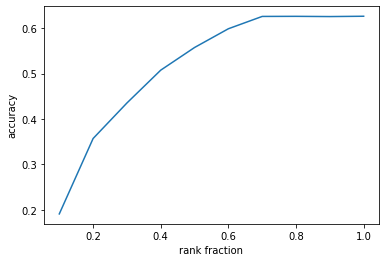

In [ ]:
## TODO: add your code below to plot the relationship between time and test set accuracy

ranks = [x[0] for x in ranks_and_accuracies] # Extract the ranks from the ranks_and_accuracies list of tuples
accuracies = [x[1] for x in ranks_and_accuracies] # Extract the accuracies from the ranks_and_accuracies list of tuples
plt.plot(ranks, accuracies) # Create plot of ranks versus accuracy
plt.xlabel('rank fraction') # Label the axes
plt.ylabel('accuracy') # Label the axes 
plt.show() # Display the plot



### Q5: Does replacing the weight matrix with the low factor matrix result in latency speed ups?

Plot the relationship of time (y-axis) vs rank percentage (x-axis). To do so add code to compute the ranks_and_times list.

Answer: No, replacing the linear layer weight matrices with low rank approximations does not seem to reduce latency. This is not surprising, since the code is simply replacing the original linear layer weight matrices with low rank approximations to those matrices that are the same size/dimension. In other words, the code is not actually using a compressed representation of the linear layer weight matrices, so we would not expect a reduction in latency (since the number of memory references and arithmetic operations required to execute inference will be approximately the same for the network with the original weight matrices and the network with the low rank approximations). 

One caveat to note is that the first time the evaluation code is run, the latency for the network using the full weight matrices appears to be significantly higher than the latency for all of the networks using the low rank approximations (but the latency appears to be roughly the same for all of the networks low rank approximations). I suspect this is due to the fact that the network with the full rank weight matrices is run first, and the first time this network is used for inference there may be significant overhead associated with fetching code/data needed to run the network other than the linear layer weights (e.g. code/data related to the network architecture, the convolutional layer weights, etc.) from lower levels of the memory hierarchy. This overhead may then be significantly reduced for all subsequent inferences that reuse some of this code/data (since the code/data may already be in higher levels of the memory hierarchy and therefore may be much faster to fetch), which would include all of the evaluations of the lower rank approximations. Notably the difference in latency between the network that uses the full rank weight matrices and the networks that use the lower rank weight matrices appears to disappear when the evaluation code is run for the second time in a row, which would be consistent with the above hypothesis. 

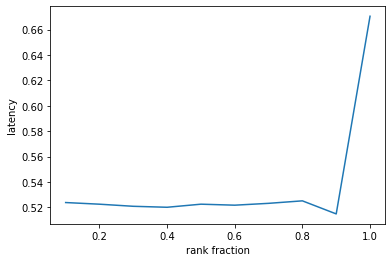

In [ ]:
## TODO: add your code below to plot the relationship between time and rank percentage

ranks = [x[0] for x in ranks_and_times] # Extract the rank values from the ranks_and_times list of tuples
latencies = [x[1] for x in ranks_and_times] # Extract the latency values from the ranks_and_times list of tuples
plt.plot(ranks,latencies) # Create a plot of ranks versus latencies
plt.xlabel('rank fraction') # Label the axes
plt.ylabel('latency') # Label the axes 
plt.show() # Display the plot


## Coding Challenge Part 3: Perform evaluations on the dataset in factorized space. (4 points)

In this section, you will perform evaluations on the dataset in factorized space.

* [**4 points**] 2 pts for question 6 and question 7.

In [ ]:

def low_rank_net_fn(batch: Batch, rank: float) -> jnp.ndarray:
  
  x = normalize(batch[0])
  total_input_dim = np.prod(x.shape[1:])

  # Do not alter the architecture code.
  net = hk.Sequential([
      hk.Conv2D(output_channels=6*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      jax.nn.relu,
      hk.Conv2D(output_channels=16*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      hk.Flatten(),
      hk.Linear(int(rank * min(total_input_dim, 3000)), with_bias=False),
      hk.Linear(3000), jax.nn.relu,
      hk.Linear(int(rank * 2000), with_bias=False), 
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(int(rank * 2000), with_bias=False), 
      hk.Linear(2000), jax.nn.relu,      
      hk.Linear(int(rank * 1000), with_bias=False), 
      hk.Linear(1000), jax.nn.relu,
      hk.Linear(int(rank * 10), with_bias=False),
      hk.Linear(10),
  ])
  return net(x)

In [ ]:
vanilla_to_low_rank_map = {
    'conv2_d': 'conv2_d',
    'conv2_d_1': 'conv2_d_1',
    'linear': ['linear', 'linear_1'],
    'linear_1': ['linear_2', 'linear_3'],
    'linear_2': ['linear_4', 'linear_5'],
    'linear_3': ['linear_6', 'linear_7'],
    'linear_4': ['linear_8', 'linear_9']
}


ranks_and_accuracies = []
ranks_and_times = []
for rank_fraction in np.arange(1.0, 0.0, -0.1):
  low_rank_net_fn_partial = partial(low_rank_net_fn, rank=rank_fraction)
  net = hk.without_apply_rng(hk.transform(low_rank_net_fn_partial)) 
  low_rank_params = net.init(jax.random.PRNGKey(42), next(train))

  print(f"Evaluating the model at " f"{rank_fraction:.2f}")

  for layer in vanilla_to_low_rank_map.keys():
    if 'conv' in layer:
      low_rank_params[layer] = params[layer]
      continue
    weight = params[layer]['w']
    # TODO: complete coding the rank_approximated_weight function to compute the SVD of the matrix to return the rank approximated weights u and v for a given matrix.
    u, v = rank_approximated_weight(weight, rank_fraction)
    low_rank_params[vanilla_to_low_rank_map[layer][0]]['w'] = u
    low_rank_params[vanilla_to_low_rank_map[layer][1]]['w'] = v
    low_rank_params[vanilla_to_low_rank_map[layer][1]]['b'] = params[layer]['b']
  
  # TODO: modify the compute_eval_metrics function below to compute the time taken for inference.
  test_accuracy, duration = compute_eval_metrics(low_rank_params, next(test), 50)
  ranks_and_times.append((rank_fraction, np.mean(duration)))
  ranks_and_accuracies.append((rank_fraction, np.mean(test_accuracy)))
  print(f"Rank Fraction / Test accuracy: "
          f"{rank_fraction:.2f} / {np.mean(test_accuracy):.3f}.")
  print(f"Rank Fraction / Duration: "
          f"{rank_fraction:.2f} / {np.mean(duration):.4f}.")

Evaluating the model at 1.00
Rank Fraction / Test accuracy: 1.00 / 0.626.
Rank Fraction / Duration: 1.00 / 0.7493.
Evaluating the model at 0.90
Rank Fraction / Test accuracy: 0.90 / 0.625.
Rank Fraction / Duration: 0.90 / 0.8440.
Evaluating the model at 0.80
Rank Fraction / Test accuracy: 0.80 / 0.626.
Rank Fraction / Duration: 0.80 / 0.7439.
Evaluating the model at 0.70
Rank Fraction / Test accuracy: 0.70 / 0.625.
Rank Fraction / Duration: 0.70 / 0.6799.
Evaluating the model at 0.60
Rank Fraction / Test accuracy: 0.60 / 0.598.
Rank Fraction / Duration: 0.60 / 0.6392.
Evaluating the model at 0.50
Rank Fraction / Test accuracy: 0.50 / 0.557.
Rank Fraction / Duration: 0.50 / 0.5410.
Evaluating the model at 0.40
Rank Fraction / Test accuracy: 0.40 / 0.507.
Rank Fraction / Duration: 0.40 / 0.4734.
Evaluating the model at 0.30
Rank Fraction / Test accuracy: 0.30 / 0.435.
Rank Fraction / Duration: 0.30 / 0.4360.
Evaluating the model at 0.20
Rank Fraction / Test accuracy: 0.20 / 0.357.
Rank F

### Q6: Plot a curve showing time vs rank percentage of the matrix 

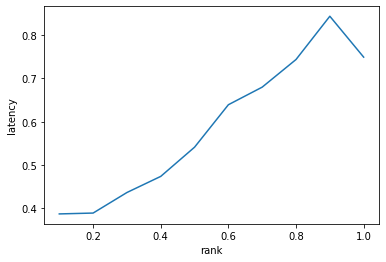

In [ ]:
# TODO: add code to plot the relationship between time vs percentage rank of the matrix.

ranks = [x[0] for x in ranks_and_times] # Extract the rank values from the ranks_and_times list of tuples
latencies = [x[1] for x in ranks_and_times] # Extract the latency values from the ranks_and_times list of tuples
plt.plot(ranks,latencies) # Create a plot of ranks versus latencies
plt.xlabel('rank') # Label the axes
plt.ylabel('latency') # Label the axes 
plt.show() # Display the plot

### Q7: What do you observe between time and the percentage rank of the matrix.

### Put your answer here: 

Latency tends to decrease as the rank fraction of the linear layer weight matrices decreases. This makes sense, since the code above uses the factorized matrices for inference, so the lower rank approximations will tend to have linear layer weight matrices with a smaller overall memory footprint than higher rank approximations (and therefore will tend to require less memory references for inference).

Interestingly, it seems like latency tends to be higher for networks using factorized linear layer weight matrices for inference than for networks that use non-factorized weight matrices until the rank fraction gets quite low (e.g. less than 0.5). For rank fractions below 0.5, it seems like the latency for factorized networks tends to be less than for any of the non-factorized networks, but at the cost of significantly lower accuracy. Perhaps these patterns are due in part to the fact that for high rank fractions it is possible for the factorized matrices to actually have a collectively larger memory footprint than the equivalent non-factorized matrix (it may also take more arithmetic operations to multiply a vector by the factorized matrices than the equivalent non-factorized matrix for high rank fractions). 



---



## Coding Challenge Part 4: Take this Further (10 bonus points)

This part of the challenge is designed to be open ended. If you wanted to show some more skills, here is your chance to shine. We include two options below -- **only do one of the options**:

**Option 1:** Implement a change that isn't SVD but minimizes inference latency while preserving accuracy. Can you outperform SVD? 



**Option 2:** Improve the quality of code for this takehome. Pretend you are reviewing a peer and add comments to cells with suggestions of how to improve the code quality. Try and make your comments action orientated and precise. 


**For Option 1, DO NOT alter the previous code sections, instead add any new code below. You should not need to add new code for Option 2, instead just add comments to cells.**


NOTE FROM RAVI: I added comments/suggestions related to improving the quality of the code for this takehome as stuff occurred to me as I was working on the problems above (frankly, I did this in part because I wasn't sure how long it would take me to figure out how to do Option 1 (and therefore wasn't sure whether I'd have time to do it)). However, I also did Option 1 below since I wanted to try out another compression approach. If you need to pick one of the options to "grade," please pick my work for Option 1 below. Thank you!  

In [ ]:
# TODO: add code for option 1 here

"""
The code in this cell quantizes the parameters of the trained neural network
from fp32 to fp16 and compares the accuracy and latency of the model using 
the original non-quantized parameters with the model using the quantized 
parameters. 
"""

"""
The function below defines the same convolutional neural network architecture
used in Part 1 of the Coding Challenge, but quantizes the image input data 
from float32 to float16 so that it is compatible with the quantized parameters. 
"""
def quant_net_fn(batch: Batch) -> jnp.ndarray:

  x = normalize(batch[0]) # normalization and standardization of image data before it is input into neural network
  x = x.astype(jnp.float16) # quantize input data from float32 to float16 

  # Do NOT alter the architecture definition below.
  net = hk.Sequential([
      hk.Conv2D(output_channels=6*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      jax.nn.relu,
      hk.Conv2D(output_channels=16*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      hk.Flatten(),
      hk.Linear(3000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(1000), jax.nn.relu,
      hk.Linear(10),
  ])
  return net(x)

"""
The function below is a version of the compute_accuracy function above that uses
quant_net to compute accuracy instead of net.

RAVI'S COMMENT: It would probably be better if compute_accuracy was defined so that
the model function is passed to it as an argument as opposed to referenced as a global
variable. That way, the compute_accuracy function could be reused for different
model architectures rather than needing to create a new compute_accuracy function
for each model architecture you want to evaluate. 
"""
def quant_compute_accuracy(params: hk.Params, batch: Batch) -> jnp.ndarray:
  predictions = quant_net.apply(params, batch) # Compute logits for each example in batch

  # TODO: add code below to compute the accuracy over the batch.
 
  """
  The line below computes accuracy by: (1) calculating the index of the column with 
  the highest logit value for each prediction (which corresponds to the number of 
  the CIFAR10 category that the image is most likely to fall into, according to the
  prediction), (2) comparing the index from (1) to the "true" category number, and
  (3) calculating the fraction of predictions that are correct.
  """
  accuracy = jnp.mean(jnp.argmax(predictions, axis=1) == batch[1])
  return accuracy

"""
The function below is a version of the compute_eval_metrics function above that uses
quant_net to compute the evaluation metrics instead of net.

RAVI'S COMMENT: It would probably be better if compute_eval_metrics was defined so that
the model function is passed to it as an argument as opposed to referenced as a global
variable. That way, the compute_eval_metrics function could be reused for different
model architectures rather than needing to create a new compute_eval_metrics function
for each model architecture you want to evaluate. 
"""
def quant_compute_eval_metrics(params, batch, n_samples):
# TODO: add code to compute the time for inference.
  duration_list = []
  accuracy_list = []
  for _ in range(n_samples):
    start = time.perf_counter() # Get the time immediately before running inference
    predictions = quant_net.apply(params, batch) # Compute logits for each example in batch
    duration = time.perf_counter() - start # Get the time immediately after running inference and subtract from start time to get an estimate of inference latency
    acc = quant_compute_accuracy(params, batch) # Compute accuracy for batch. 
    duration_list.append(duration) # Append most recent latency measurement to list of latency measurements
    accuracy_list.append(acc) # Append most recent accuracy measurement to list of accuracy measurements

  return accuracy_list, duration_list

net = hk.without_apply_rng(hk.transform(net_fn))
quant_net = hk.without_apply_rng(hk.transform(quant_net_fn)) 
quantized_params = quant_net.init(jax.random.PRNGKey(42), next(train)) # Initialize quantized model parameters
quantized_params = jax.tree_util.tree_map(lambda x: x.astype(jnp.float16), params) # Create a pytree of quantized parameters
quant_compute_eval_metrics(quantized_params, next(test), 10) # Run quant_compute_eval_metrics once so that code and data that is reused for for each inference is loaded before measuring latency 
compute_eval_metrics(params, next(test), 10) # Run compute_eval_metrics once so that code and data that is reused for for each inference is loaded before measuring latency 
orig_test_accuracy, orig_duration = compute_eval_metrics(params, next(test), 50) # Compute accuracy and latency for original non-quantized parameters
quant_test_accuracy, quant_duration = quant_compute_eval_metrics(quantized_params, next(test), 50) # Compute accuracy and latency for quantized parameters

print(f"Quantized accuracy: {np.mean(quant_test_accuracy)}")
print(f"Quantized latency: {np.mean(quant_duration)}")
print(f"Non-quantized accuracy: {np.mean(orig_test_accuracy)}")
print(f"Non-quantized latency: {np.mean(orig_duration)}")



Quantized accuracy: 0.625999927520752
Quantized latency: 0.416282414300008
Non-quantized accuracy: 0.6259000301361084
Non-quantized latency: 0.5359369176800101


RAVI'S COMMENTS ON RESULTS OF ABOVE CODE: 

It seems like quantizing the model parameters from 32 bit floating point to 16 bit floating point enables a substantial reduction in latency (typically around 20%) with virtually no reduction in accuracy. This compares favorably to the low rank approximation approach, where substantial reductions in latency were only obtained at the cost of a large loss in accuracy. 

## You have made it to the end of the challenge!

Before you submit your completed challenge document, please make sure to **save and pin your revisions** before submitting a link to your submission via the [Cohere For AI Scholars Program Application.](https://jobs.lever.co/cohere/) 